In [ ]:
import tensorflow as tf
import numpy as np

Definim els valors d'entrada i els seus respectius valors de sortida

In [ ]:
#talles_usa = np.array([6, 7, 7.5, 8, 9, 10, 10.5, 11.5, 12], dtype=float)
cm = np.array ([0, 21, 22, 23.5, 24, 25, 25.5, 26, 27, 28, 28.5, 29.5, 30 ], dtype=float)
talles_eur = np.array([0, 34.5, 35.5, 37.5, 38.5, 40, 40.5, 41, 42.5, 44, 44.5, 45.5, 46], dtype=float)


Definim el tipus i nombre de les capes

In [ ]:
capa_sortida= tf.keras.layers.Dense(units= 1, input_shape=[1])
model=tf.keras.Sequential([capa_sortida])

Entrenament de la xarxa (per a que la red aprengui a ajustar els pesos i biaixos per a aprendre mes eficientment.)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
    )

print("Inicialitzant l'entrenament de la red...")
historial= model.fit(cm, talles_eur, epochs=1000, verbose=False)

print("Model entrenat!")

Inicialitzant l'entrenament de la red...
Model entrenat!


Per poder veure el resultat de la funció d'error en un gràfic.

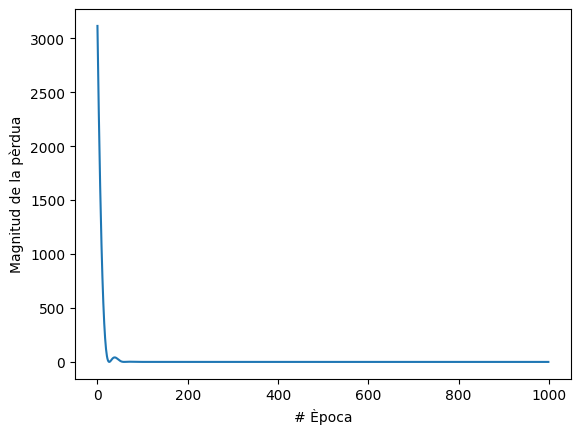

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Època")
plt.ylabel("Magnitud de la pèrdua")
plt.plot(historial.history["loss"])

In [ ]:
print("predicció del valor")
resultat = model.predict([20])
print("el resultat es" + str(resultat) + "en talla de sabates europea")

predicció del valor
1/1 [==============================] - 0s 103ms/step
el resultat es[[31.820858]]en talla de sabates europea


In [ ]:
print("variables internes del model")
print(capa_sortida.get_weights())

#print(capa_oculta1.get_weights())
#print(capa_oculta2.get_weights())
#print(capa_sortida.get_weights())

variables internes del model
[array([[1.5340316]], dtype=float32), array([1.1402249], dtype=float32)]


In [ ]:
#guardar el programa
model.save('de_cm_a_talla_eur.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#tenim en compte que google colab treballa sobre linux
!ls

de_cm_a_talla_eur.h5  sample_data


In [ ]:
#tenim l'arxiu descarregat, ara per poder usar-lo amb tensorlfow.js l'em de convertir a un altre format. Per fer-ho primer instalem tf.js.
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 13.1 MB/s eta 0:00:00


In [ ]:
#creem una carpeta on es guardaran els arxius resultants de la conversió.
!mkedir Carpeta_Talles_Sabates

#executar la conversió.
!tensorflowjs_converter --input_format keras de_cm_a_talla_eur.h5 Carpeta_Talles_Sabates

/bin/bash: line 1: mkedir: command not found
2023-10-31 09:15:53.125582: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 09:15:53.125649: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 09:15:53.125693: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 09:15:54.637756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!ls Carpeta_Talles_Sabates


group1-shard1of1.bin  model.json
